<a href="https://www.kaggle.com/code/ramsesmdlc/house-prices-linear-regression?scriptVersionId=134320269" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [15]:
#Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

from sklearn.base import BaseEstimator, TransformerMixin # base classes (provide common functionality and methods for all transformers and estimators)
from sklearn.impute import SimpleImputer # completing/replacing missing values
from sklearn.preprocessing import OneHotEncoder # Machine Learning (One Hot Encoder Categorical Attributes)
from sklearn.preprocessing import StandardScaler # Machine Learning (Scaling data) - Z-Score Normalization)
from sklearn.pipeline import Pipeline # Machine Learning (Pipeline class for numerical features)
from sklearn.compose import ColumnTransformer # Machine Learning (Transformation of: numerical features + categorical attributes)

<div class="alert alert-block alert-warning"><b>Point 0, 1, 2 and 3:</b> In following steps we are going to apply several tehcniques, methods or procedures to check and assess the training dataset. Furthermore, in these stages we are not going to modify or edit the training dataset.</div>

# __0. Important__

Type of machine learning system to build:

1. Supervised Learning: __Linear Regression (Gradient Descent)__
2. Batch Learning (also called "offline learning")
3. Model-based learning

Goal:
1. __Predict the sales price for each house__

# __1. Loading the Data - Training Dataset__

In [2]:
training_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# __2. Exploratory Data Analysis (EDA) - Training Dataset__

## <span style="color:red"> __THIS IS AN UNFINISHED NOTEBOOK! - I AM STILL WORKING ON IT__</span>



  Shape of the dataframe:  (1460, 81) 

  Head of the dataframe:  

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   


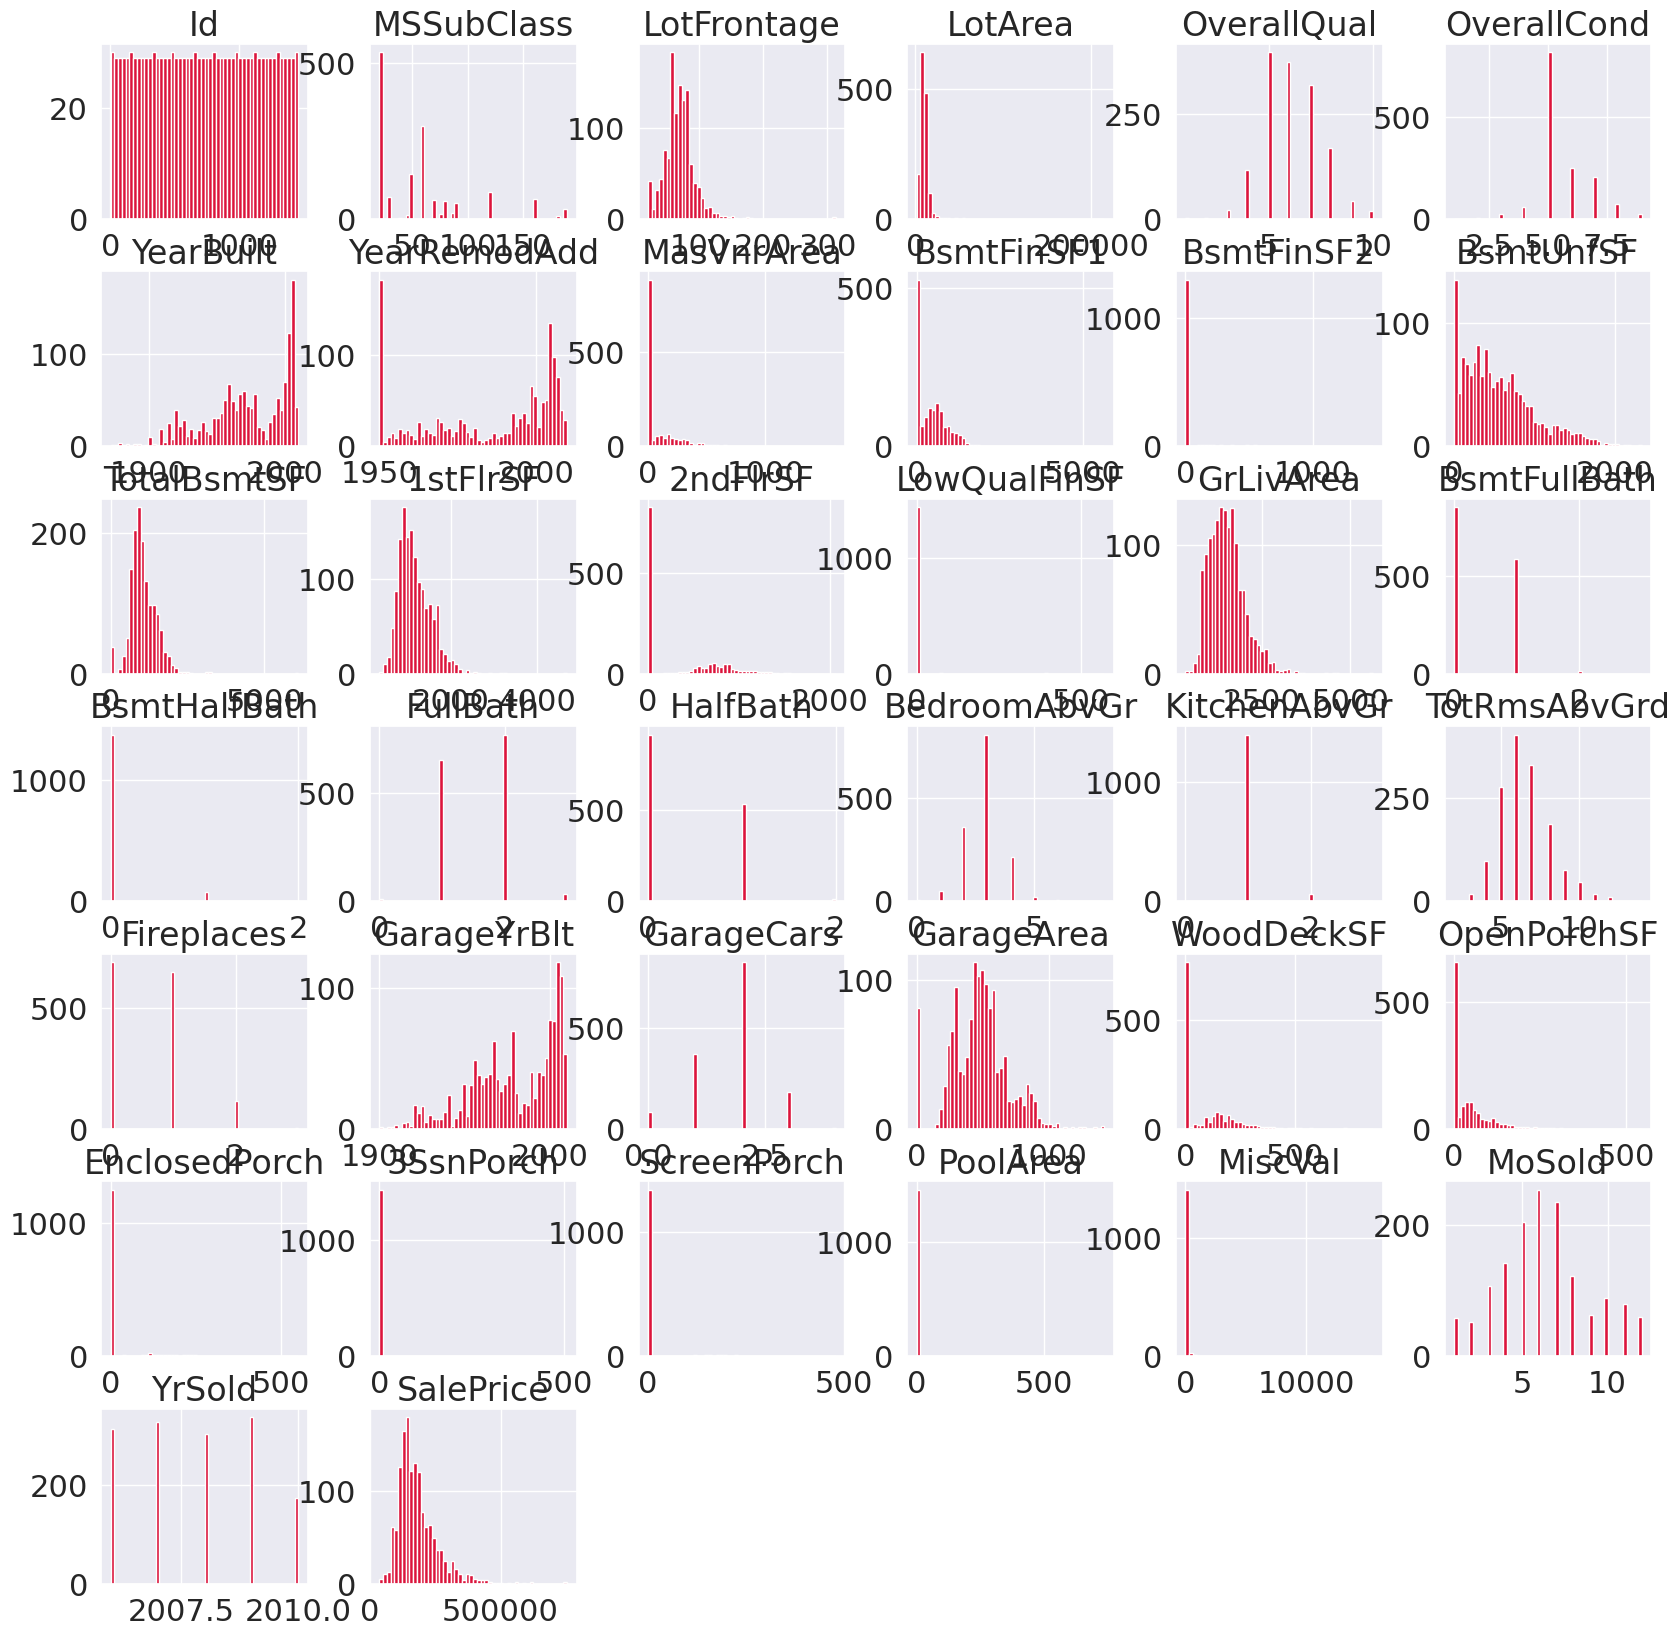


  Boxplots for the numerical columns: 



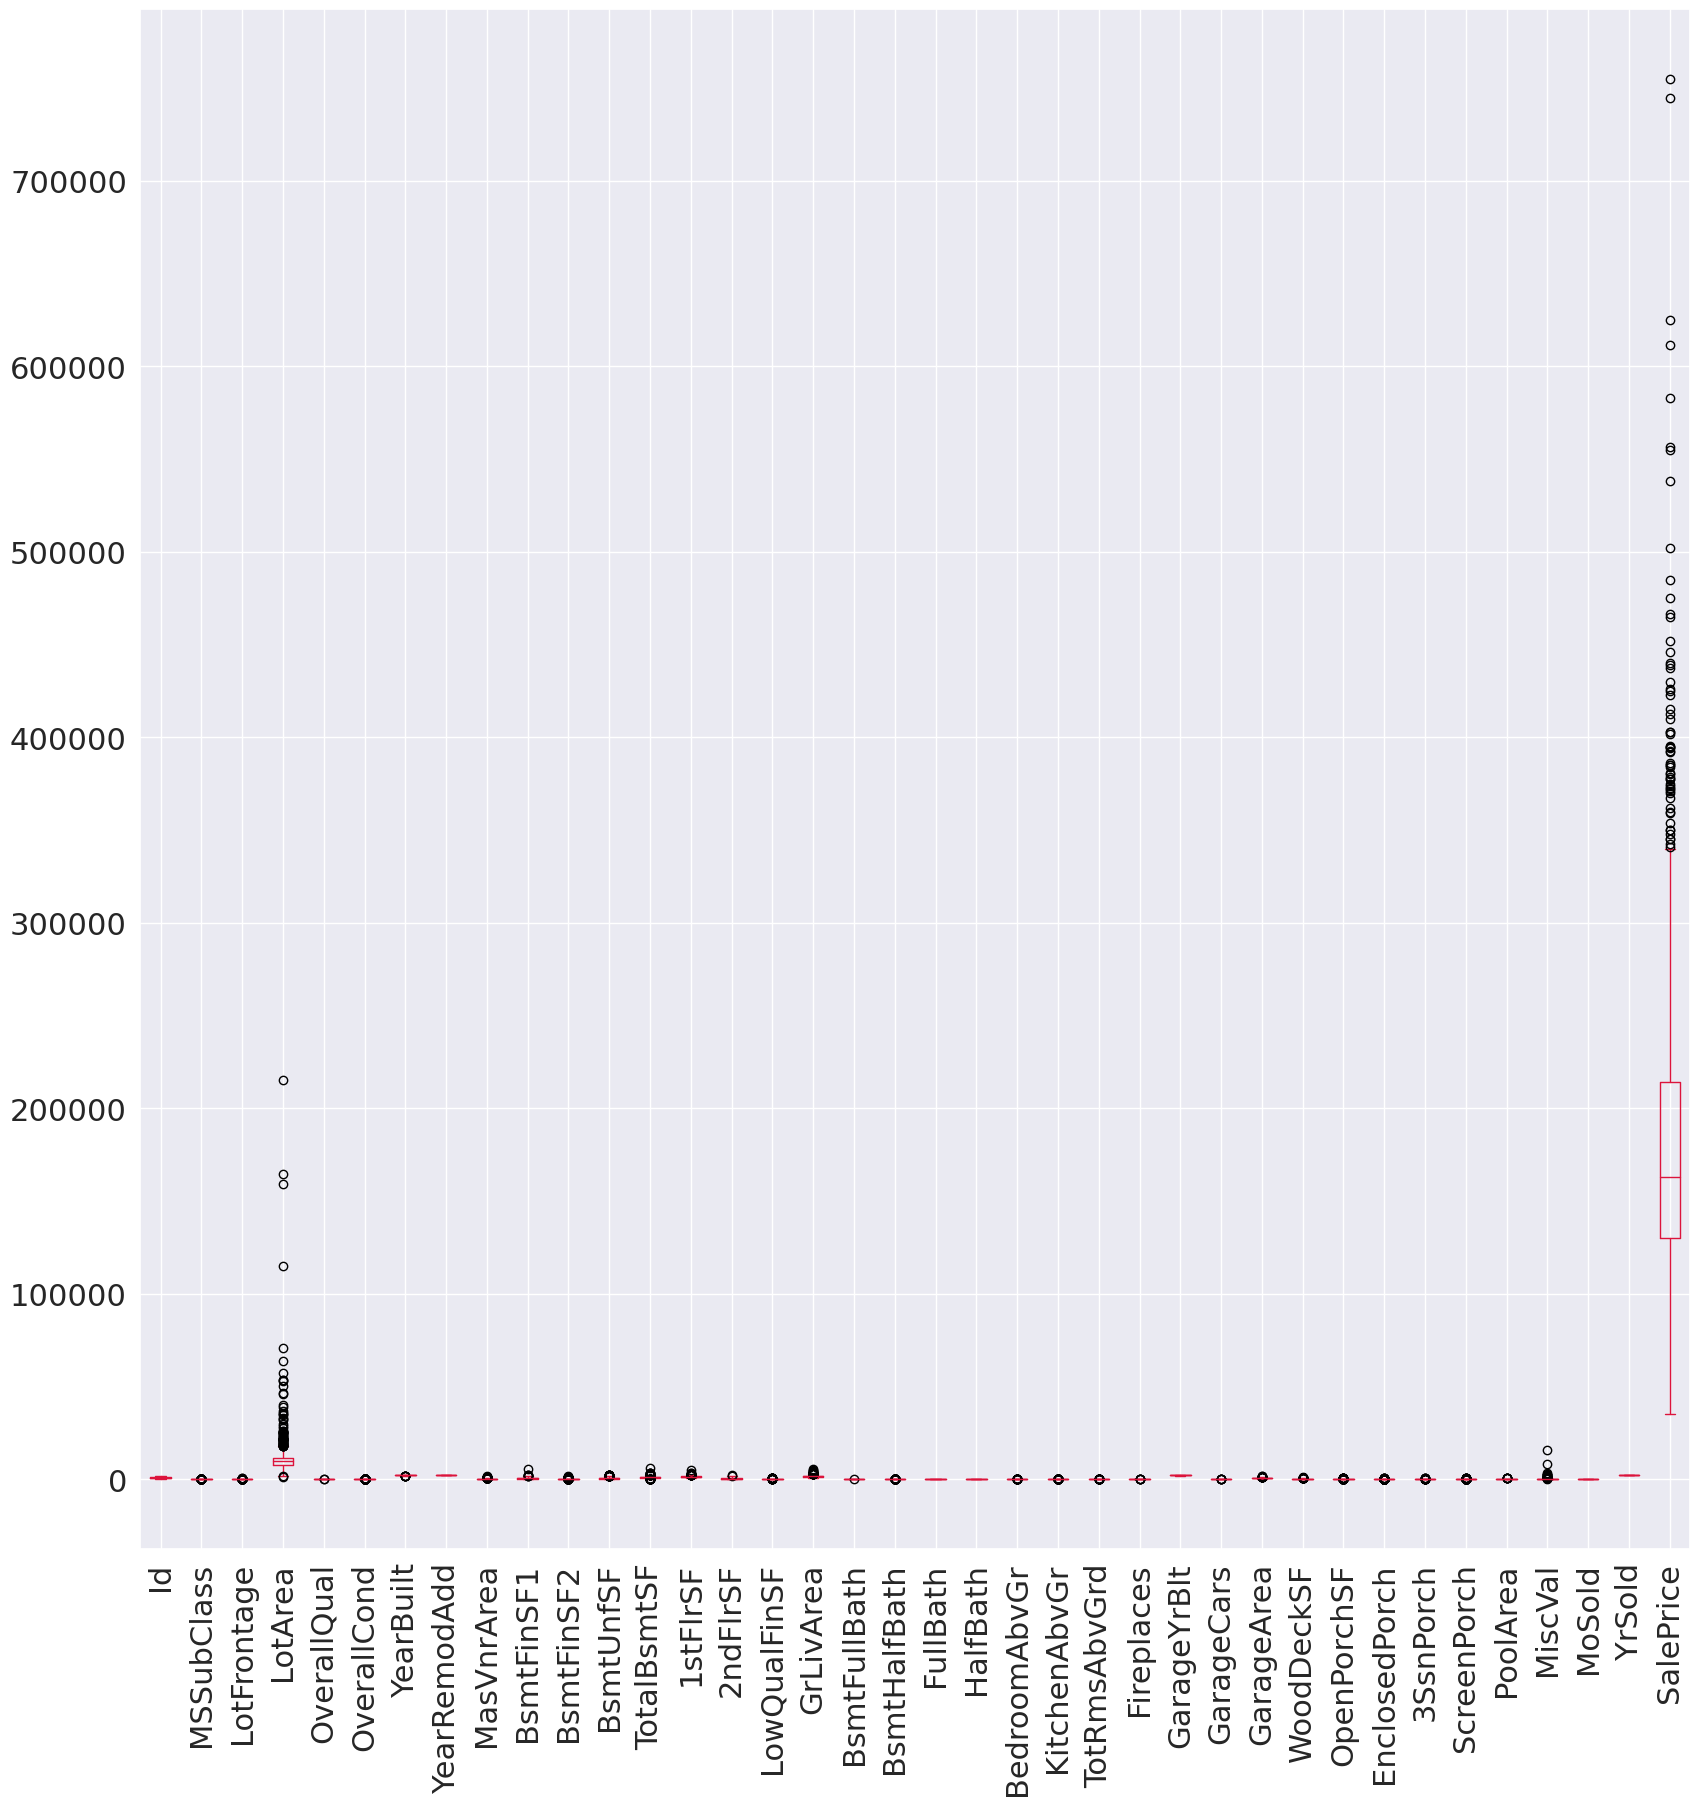


  Standard Correlation Coefficient of the numerical columns: 

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759 

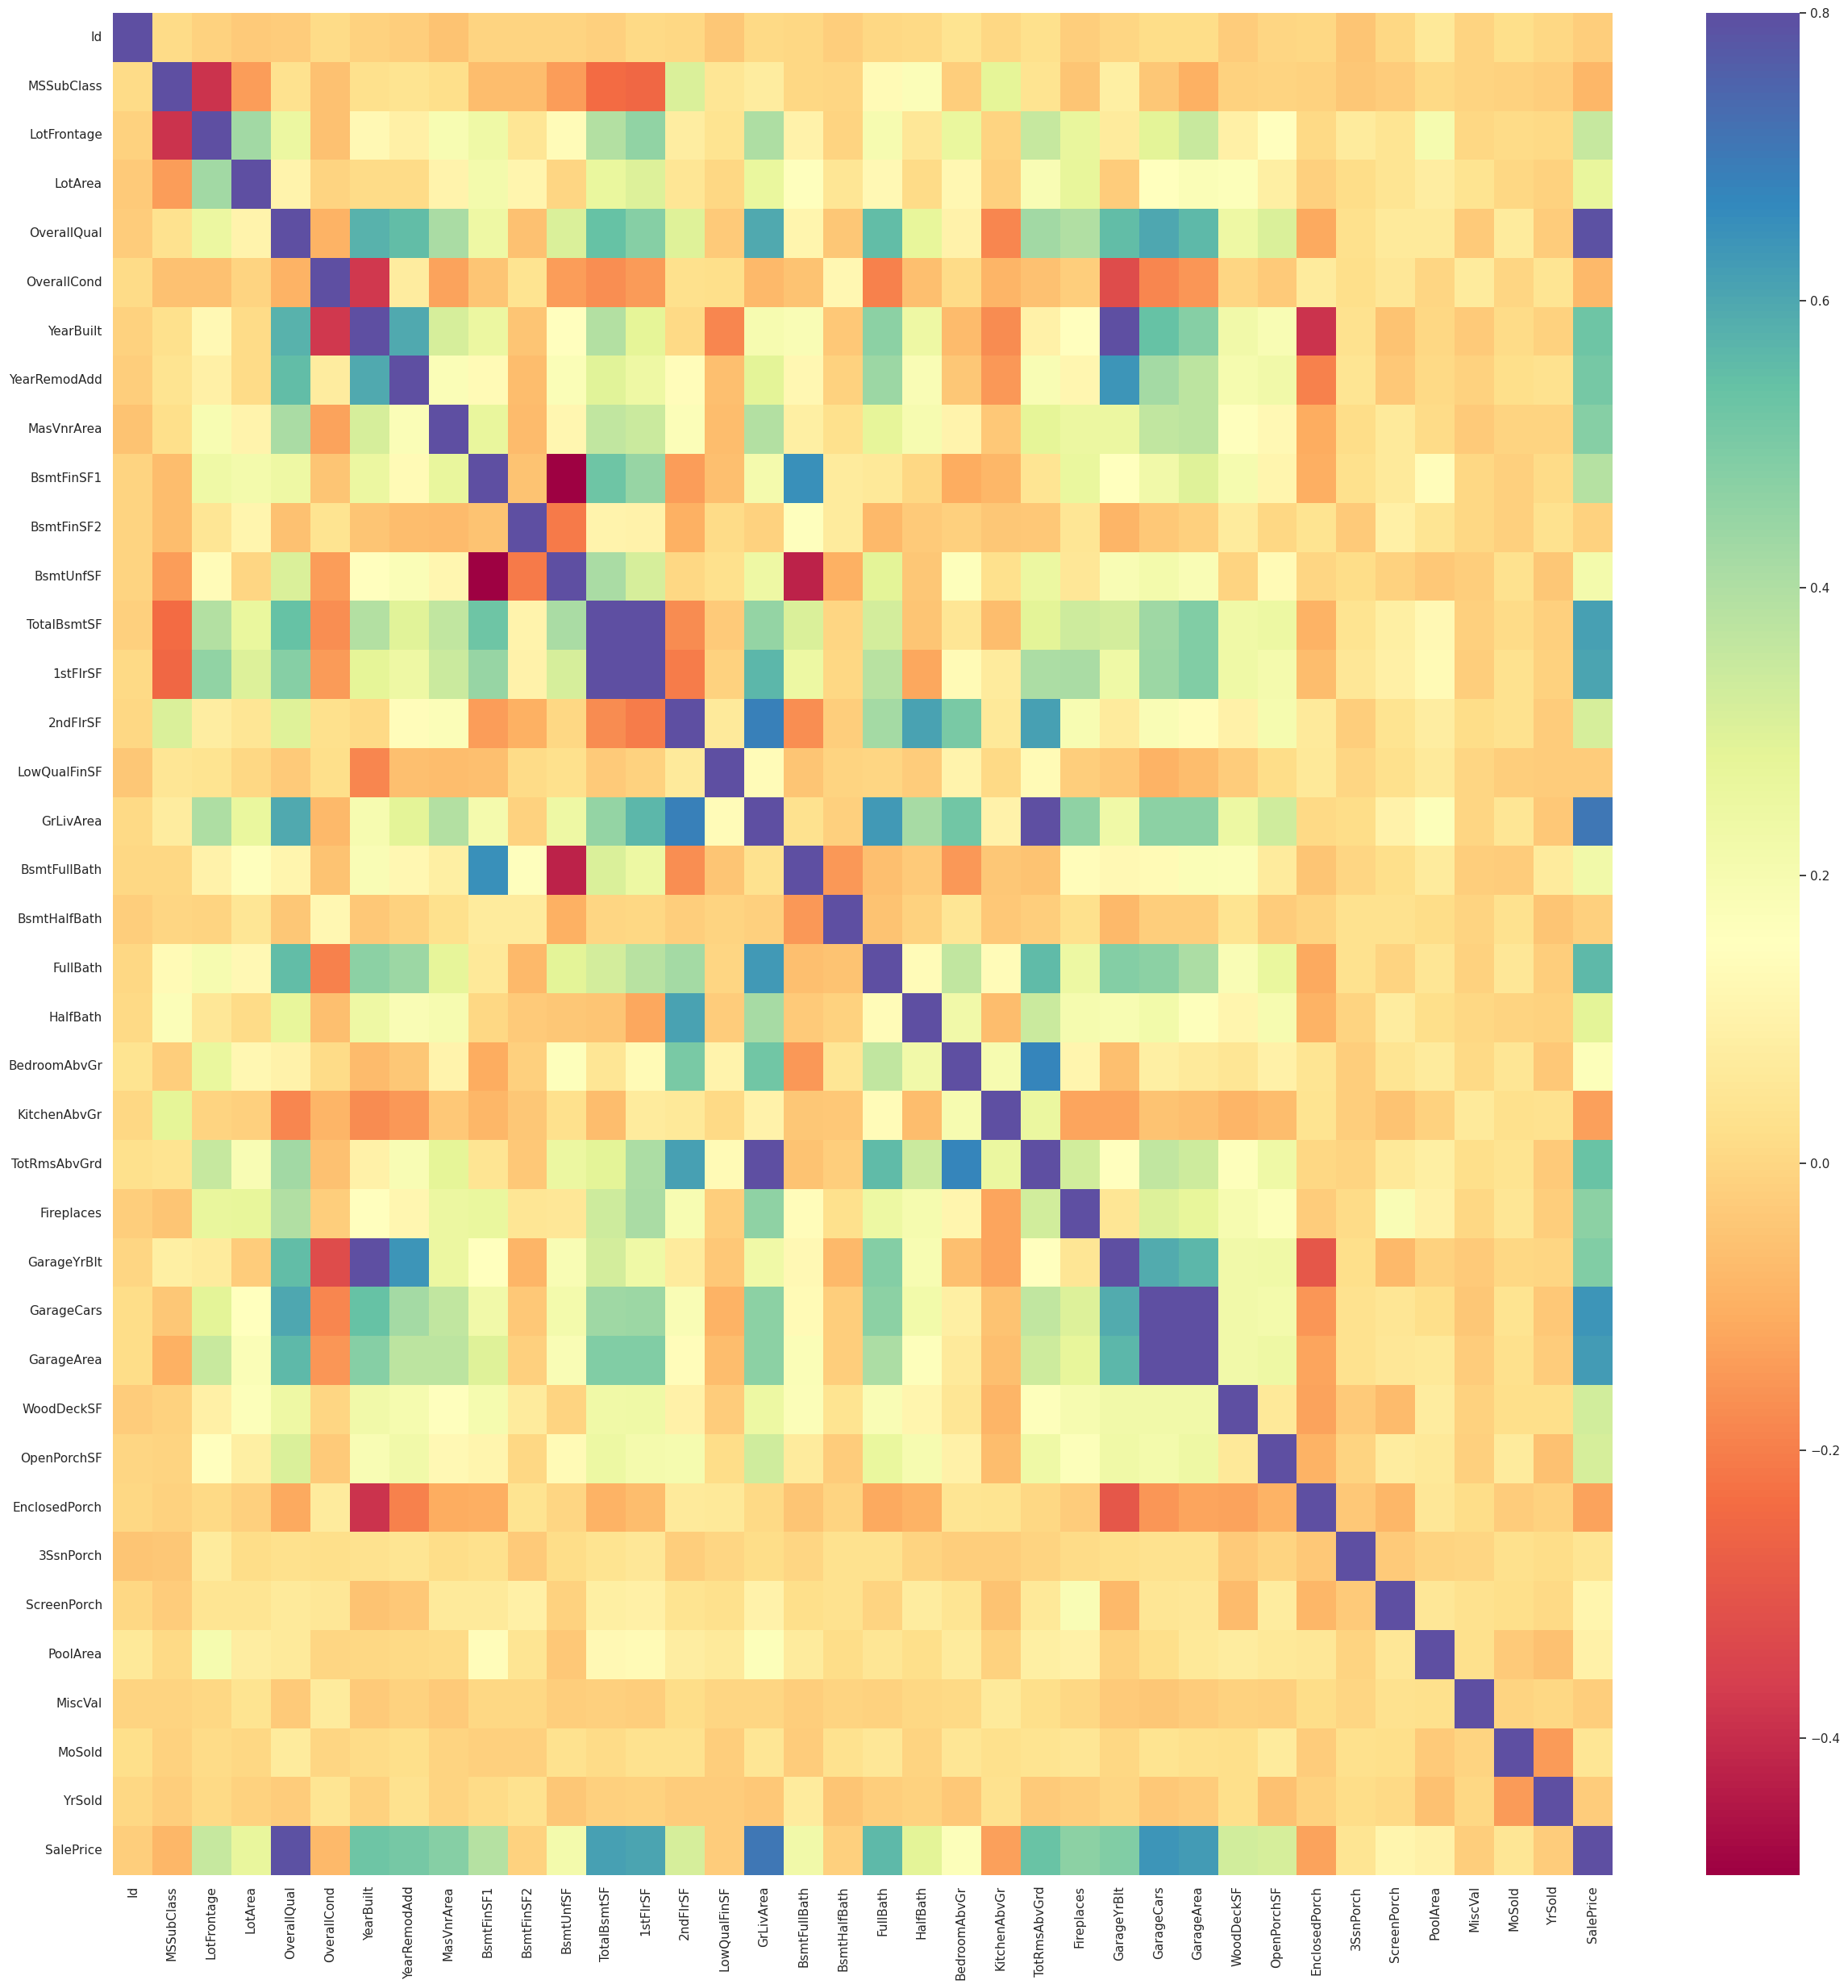

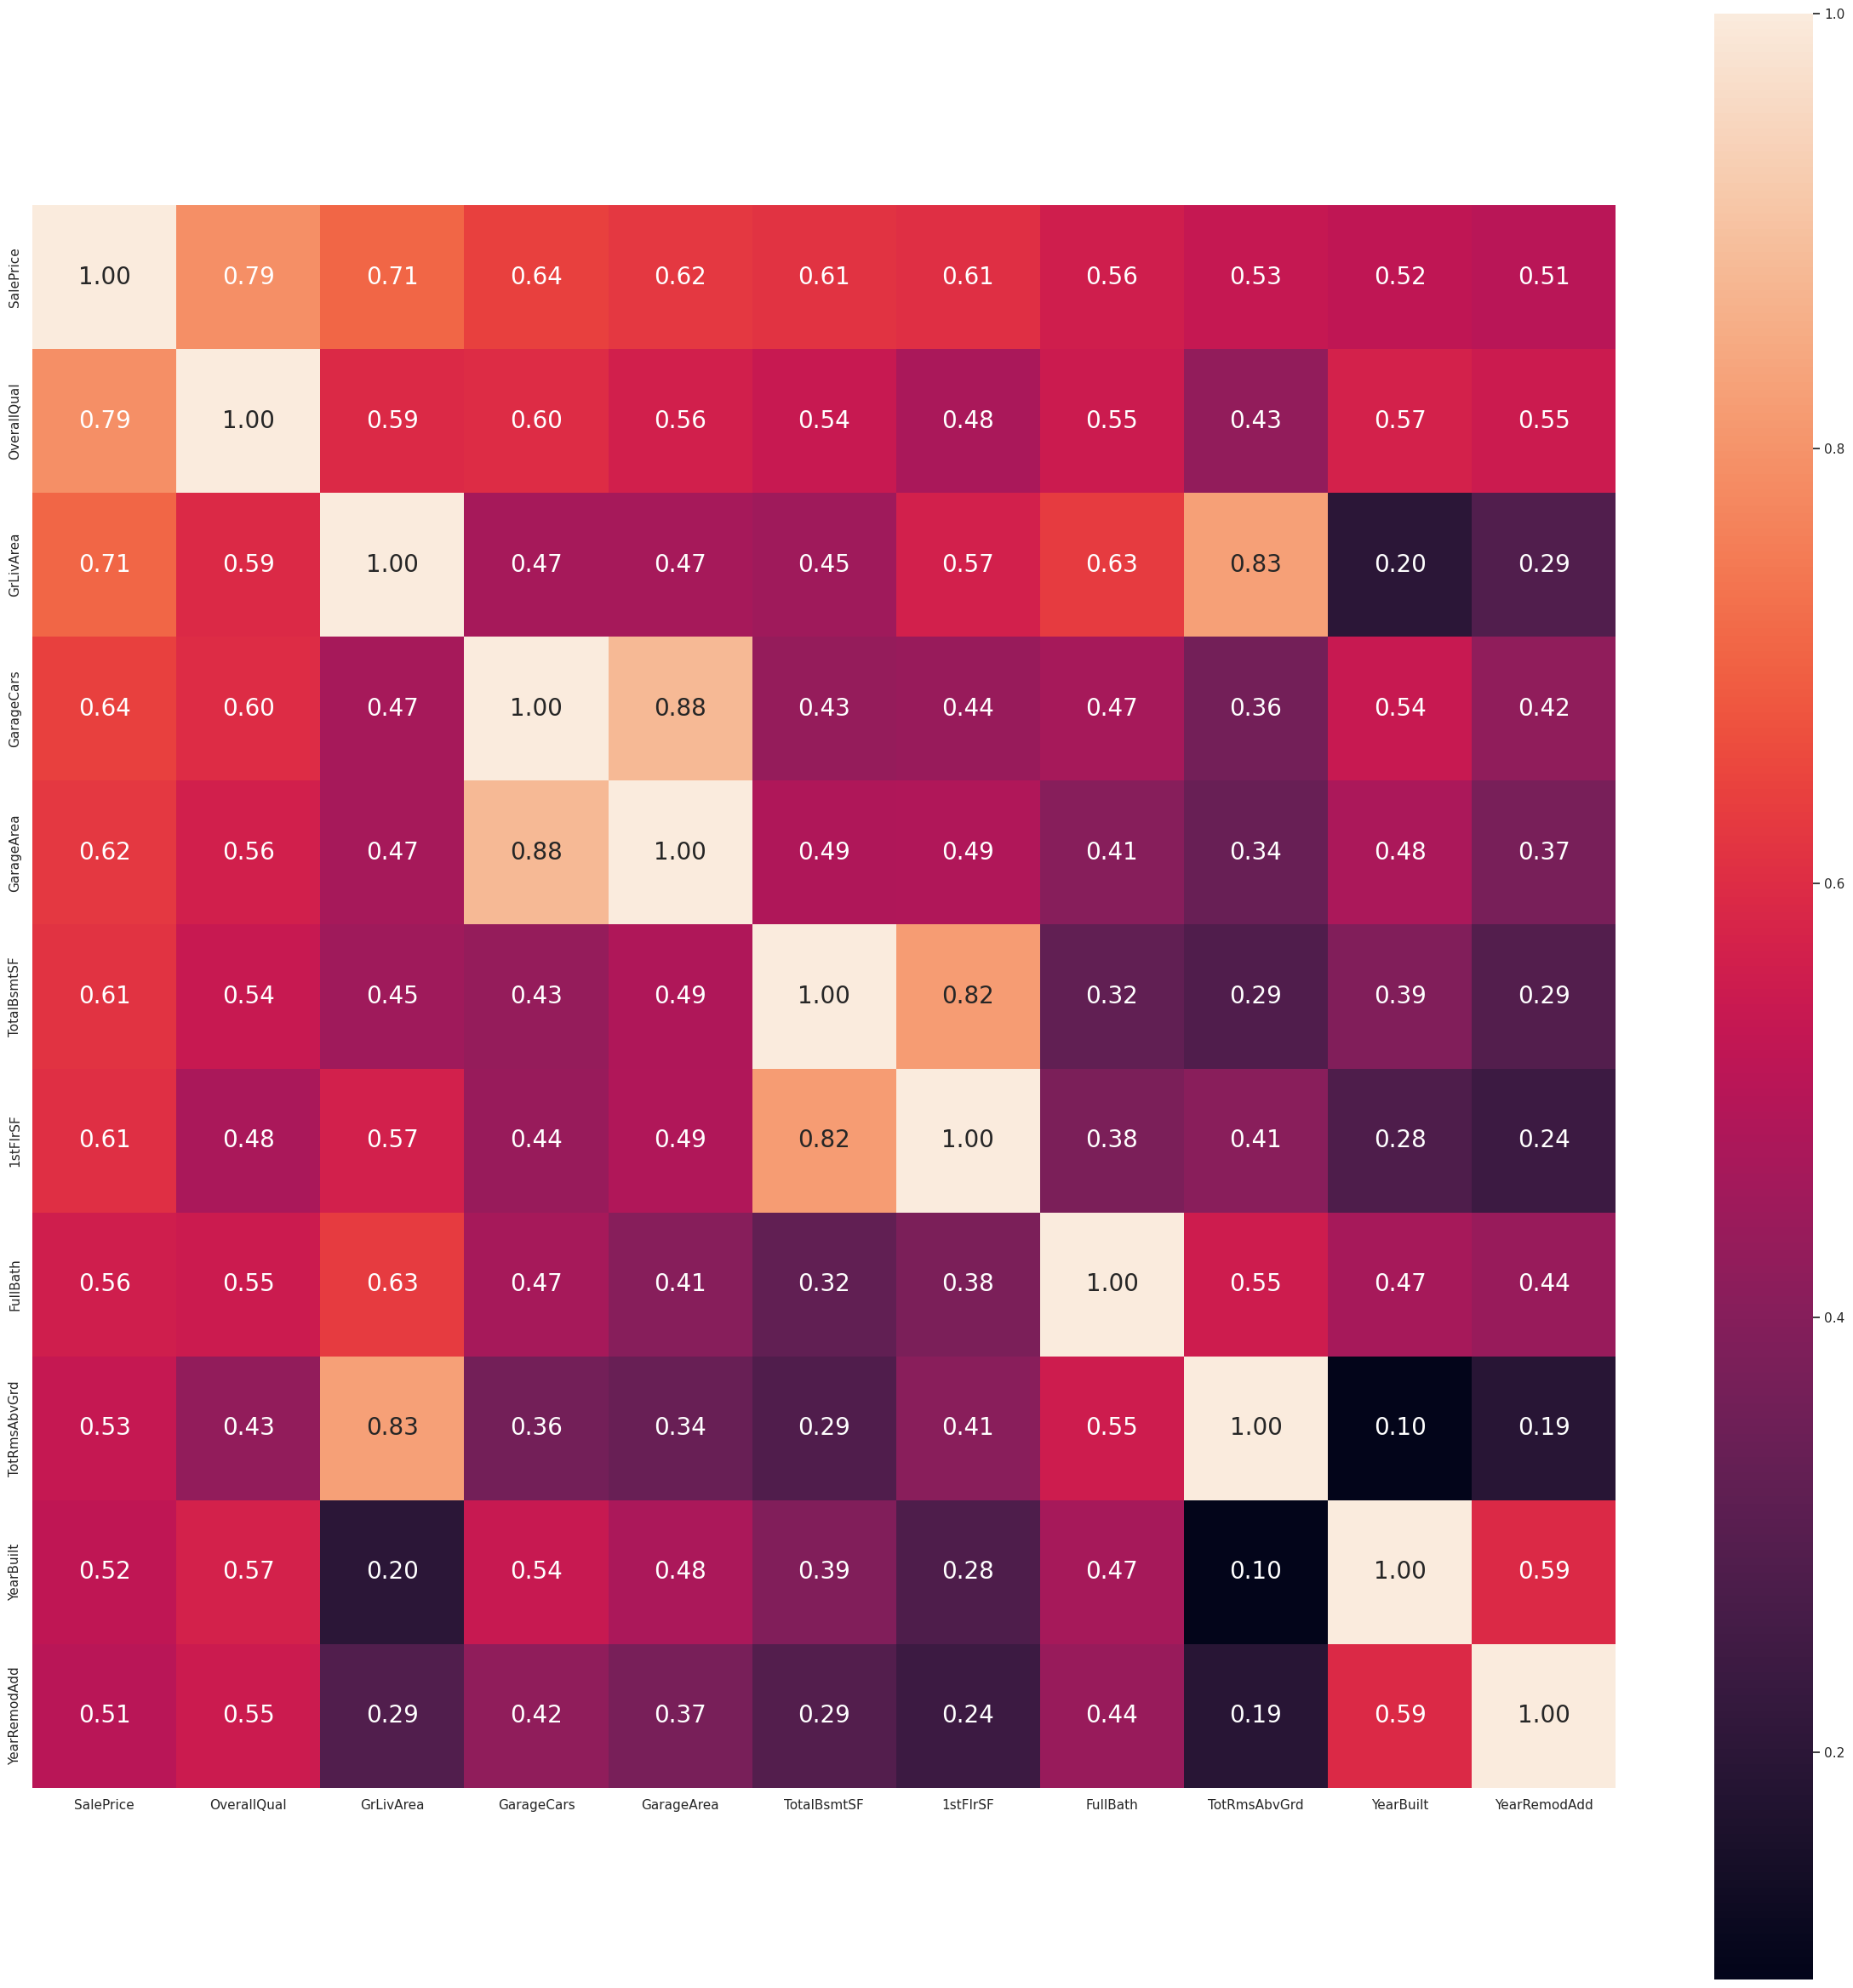

In [19]:
def EDA(training_data):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe:",'\033[0m', training_data.shape, "\n")
    
  # Print the "head" of the dataframe
  print('\033[1m','\033[94m',"Head of the dataframe:",'\033[0m', "\n")
  print(training_data.head())
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe:",'\033[0m', "\n")
  training_data.info()
 
  # Print the "number and percentage" of missing values per column" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Number and percentage of missing values per column:", '\033[0m' + "\n")
  missing = training_data.isnull().sum()
  percent = missing / training_data.shape[0] * 100
  print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

  # Print the "summary statistics of the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Summary statistics of the numerical columns:", '\033[0m' + "\n")
  print(training_data.describe())  
    
  # Plot "histograms for the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Histograms for the numerical columns:", '\033[0m' + "\n")
  training_data.hist(bins= 50, figsize=(20,20),color= "Crimson")
  plt.show()  
    
  # Plot "boxplots for the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Boxplots for the numerical columns:", '\033[0m' + "\n")
  training_data.boxplot(figsize=(20,20), rot=90, color= "Crimson")
  plt.show()
  
  # Print the "Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Standard Correlation Coefficient of the numerical columns:", '\033[0m' + "\n")
  print(training_data.corr())    
  
  print(training_data.corr()["SalePrice"].sort_values(ascending=False))
    
  # Plot "heatmap of the Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the numerical columns" of the dataframe
  print("\n" +'\033[1m','\033[94m', "Correlation matrix for the numerical columns:", '\033[0m' + "\n")
  corr = training_data.corr()
  sns.set(rc={"figure.figsize":(30, 30)}) #width=20, height=20
  #sns.heatmap(corr, annot = True, cmap="Spectral")
  sns.heatmap(corr, vmax=.8, cmap="Spectral")
  plt.show()

  k = 11 #number of variables for heatmap
  cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
  cm = np.corrcoef(training_data[cols].values.T)
  sns.set(font_scale=1)
  hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
  plt.show()
    
# Call the function
EDA(training_data)